In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

In [2]:
df = pd.read_csv('predict_loan_status.csv')

In [3]:
df.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- In above information, we can clearly see there are columns which contains Null values.

In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

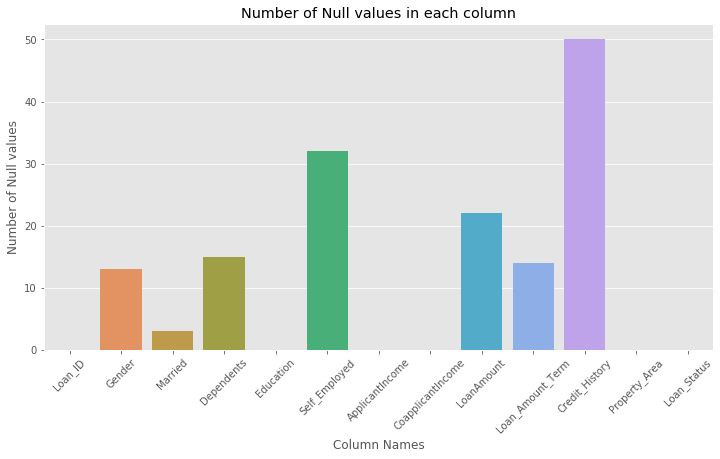

In [6]:
# lets visualize percentage of data is Null
plt.figure(figsize=(12,6))
total = df.isna().sum()
sns.barplot(x=df.columns, y=total)
plt.title("Number of Null values in each column")
plt.xlabel("Column Names")
plt.ylabel("Number of Null values")
plt.xticks(rotation=45)

In [7]:
# we can't ignore missing values because they are important to our prediction.
# We will use backward fill method for filling missing values.
df.fillna(method='bfill', inplace=True)

In [8]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
loan_mapping = {'Y' : 1, 'N': 0}
df['Loan_Status'] = df['Loan_Status'].map(loan_mapping).astype(np.int)

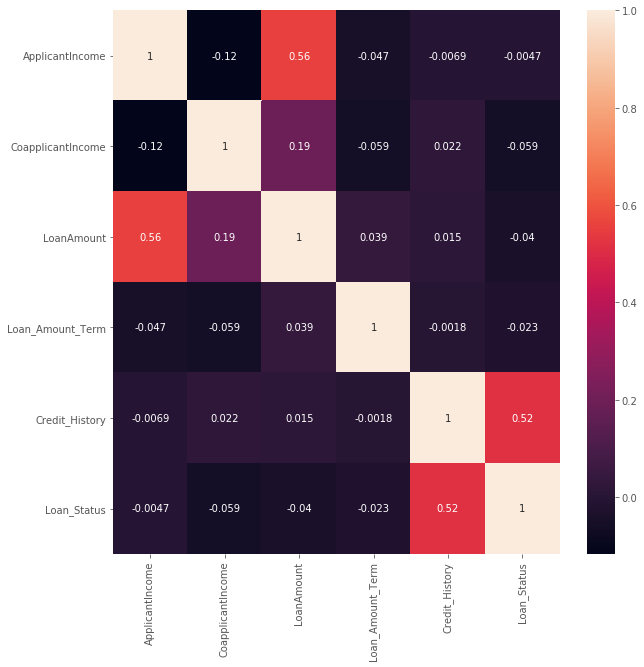

In [10]:
#lets take look at correlation matrix
plt.figure(figsize=(10,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

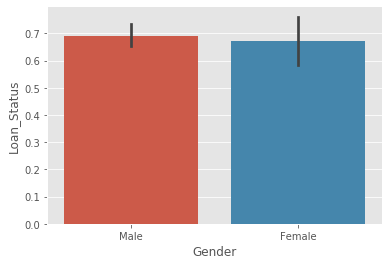

In [11]:
#lets see relation between Gender and Loan_status
sns.barplot(x='Gender', y='Loan_Status', data=df)

- Above plot shows, there's no big differnce in loan_status of gender.

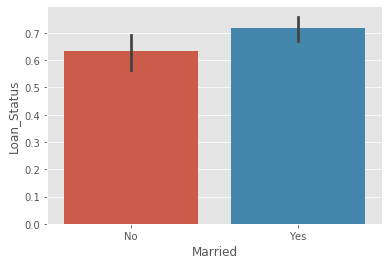

In [12]:
#lets see relation between Gender and Loan_status
sns.barplot(x='Married', y='Loan_Status', data=df)

In [13]:
# Lets first map all categorical columns into numerical columns
gender_mapping = {'Male' : 1, 'Female': 0}
married_mapping = {'Yes': 1, 'No': 0}
education_mapping = {'Graduate': 1, 'Not Graduate': 0}
employ_mapping = {'Yes': 1, 'No': 0}
property_mapping = {'Urban': 0, 'Semiurban': 1, 'Rural': 2}
dependents_mapping = {'0' : 0, '1' : 1, '2': 2, '3+': 3}

In [14]:
df['Gender'] = df['Gender'].map(gender_mapping).astype(np.int)
df['Married'] = df['Married'].map(married_mapping).astype(np.int)
df['Education'] = df['Education'].map(education_mapping).astype(np.int)
df['Self_Employed'] = df['Self_Employed'].map(employ_mapping).astype(np.int)
df['Property_Area'] = df['Property_Area'].map(property_mapping).astype(np.int)
df['Dependents'] = df['Dependents'].map(dependents_mapping).astype(int)

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,0,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1


- Above plot shows Married people tends to have advantage over unmarried people. 71% percent married people get loan_status as 'YES' and 63% unmarried people get loan_status as 'YES'.

Text(0, 0.5, 'Frequency of Loan Status')

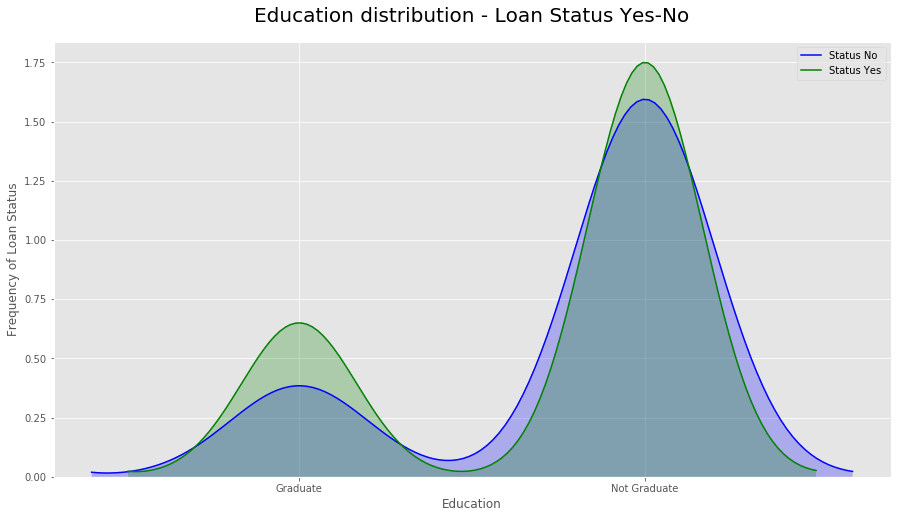

In [16]:
plt.figure(figsize=(15, 8))
ax = sns.kdeplot(df['Education'][df['Loan_Status'] == 1],
                 color='b', shade=True, label='Status No', bw=0.2
                )
ax = sns.kdeplot(df.loc[(df['Loan_Status'] == 0), 'Education'],
                 color='g', shade=True, label='Status Yes'
                )
label = ['Graduate', 'Not Graduate']
plt.xticks(sorted(df['Education'].unique()), label)
plt.title("Education distribution - Loan Status Yes-No", pad=20, fontsize=20)
plt.xlabel('Education')
plt.ylabel('Frequency of Loan Status')

In [17]:
X = df.drop(['Loan_ID','Loan_Status'], axis=1)
y = df['Loan_Status']

In [18]:
def scale_data(df, scaler):
    scaled_features = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
    return scaled_df

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_df = scale_data(X, sc)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, random_state=42)

In [21]:
X_train.shape, y_train.shape

((460, 11), (460,))

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [23]:
def get_score(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [24]:
lr_score = get_score(LogisticRegression(), X_train, y_train, X_test, y_test)
svc_score = get_score(SVC(), X_train, y_train, X_test, y_test)
rf_score = get_score(RandomForestClassifier(n_estimators=60), X_train, y_train, X_test, y_test)

In [25]:
lr_score, svc_score, rf_score

(0.7727272727272727, 0.7792207792207793, 0.7597402597402597)

In [26]:
cross_val_score(LogisticRegression(), scaled_df, y, cv=5).mean()

0.7980807676929229

In [27]:
cross_val_score(SVC(), scaled_df, y, cv=5).mean()

0.7964547514327602

In [28]:
cross_val_score(RandomForestClassifier(n_estimators=80), scaled_df, y, cv=5).mean()

0.7703985072637611

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
grid_cv = GridSearchCV(LogisticRegression(), grid, cv=10, n_jobs=-1)
grid_cv.fit(scaled_df, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [31]:
print("Tuned reults (best parameters)", grid_cv.best_params_)
print("accuracy: ", grid_cv.best_score_)

Tuned reults (best parameters) {'C': 0.01, 'penalty': 'l2'}
accuracy:  0.8030671602326811


In [32]:
rf_grid = {'n_estimators': [20, 40, 60, 80, 100, 120],
          'criterion' : ['gini', 'entropy'],
          'max_features' : [4, 6, 8, 10, 'auto']}

grid_randdom_cv = GridSearchCV(RandomForestClassifier(), rf_grid, n_jobs=-1)
grid_randdom_cv.fit(scaled_df, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [33]:
print("Best parameters (rf best parameters): ", grid_randdom_cv.best_params_)
print("Best score: ", grid_randdom_cv.best_score_)

Best parameters (rf best parameters):  {'criterion': 'gini', 'max_features': 10, 'n_estimators': 40}
Best score:  0.7850726376116219
